In [7]:
import json
import pandas as pd
from typing import Dict, Any
import sys

sys.path.append("/Users/yijuilee/project_robyn/robynpy_interfaces/Robyn/python/src")
from robyn.modeling.feature_engineering import FeaturizedMMMData
from robyn.modeling.entities.modeloutputs import ModelOutputs, Trial
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.enums import (
    DependentVarType,
    AdstockType,
    SaturationType,
    ProphetVariableType,
    PaidMediaSigns,
    OrganicSigns,
    ContextSigns,
    ProphetSigns,
    CalibrationScope,
)
from utils.data_mapper import export_data, import_data, save_data_to_json, load_data_from_json

In [8]:
# Load data from JSON
loaded_data = load_data_from_json(
    "/Users/yijuilee/project_robyn/robynpy_interfaces/Robyn/python/src/tutorials/data/R/exported_data.json"
)
imported_data = import_data(loaded_data)

In [9]:
# Display MMM Data
mmm_data = imported_data["mmm_data"]
display(mmm_data.data.head())

# Display Holidays Data
holidays_data = imported_data["holidays_data"]
display(holidays_data.dt_holidays.head())

# Display Hyperparameters
hyperparameters = imported_data["hyperparameters"]
print("Adstock Type:", hyperparameters.adstock)
print("Lambda:", hyperparameters.lambda_)
print("Train Size:", hyperparameters.train_size)

# Display Featurized MMM Data
featurized_mmm_data = imported_data["featurized_mmm_data"]
display(featurized_mmm_data.dt_mod.head())

# Display Model Outputs

model_outputs = imported_data["model_outputs"]

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,22358.3467,0.0,12728.4889,2.430128e+07,0.0000,0.0000,8125009,7607.1329,na,19401.6538
1,2015-11-30,2.584277e+06,28613.4533,0.0,0.0000,5.527033e+06,9837.2385,4133.3333,7901549,1141.9525,na,14791.0000
2,2015-12-07,2.547387e+06,0.0000,132278.4,453.8667,1.665159e+07,12044.1197,3786.6667,8300197,4256.3754,na,14544.0000
3,2015-12-14,2.875220e+06,83450.3067,0.0,17680.0000,1.054977e+07,12268.0703,4253.3333,8122883,2800.4907,na,2800.0000
4,2015-12-21,2.215953e+06,0.0000,277336.0,0.0000,2.934090e+06,9467.2480,3613.3333,7105985,689.5826,na,15478.0000


,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


Adstock Type: AdstockType.GEOMETRIC
Lambda: 0.0
Train Size: (0.5, 0.8)


,ds,dep_var,trend,season,holiday,competitor_sales_B,events,tv_S,ooh_S,print_S,facebook_S,search_S,newsletter
0,2015-11-23,2.754372e+06,1.715453e+06,1.126434e+06,0.000000,8125009,0.0,22358.3467,0.0,12728.4889,7607.1329,0.0000,19401.6538
1,2015-11-30,2.584277e+06,1.716652e+06,9.012481e+05,0.000000,7901549,0.0,28613.4533,0.0,0.0000,1141.9525,4133.3333,14791.0000
2,2015-12-07,2.547387e+06,1.717850e+06,7.163430e+05,0.000000,8300197,0.0,0.0000,132278.4,453.8667,4256.3754,3786.6667,14544.0000
3,2015-12-14,2.875220e+06,1.719048e+06,6.931447e+05,0.000000,8122883,0.0,83450.3067,0.0,17680.0000,2800.4907,4253.3333,2800.0000
4,2015-12-21,2.215953e+06,1.720247e+06,7.855262e+05,512014.524528,7105985,0.0,0.0000,277336.0,0.0000,689.5826,3613.3333,15478.0000


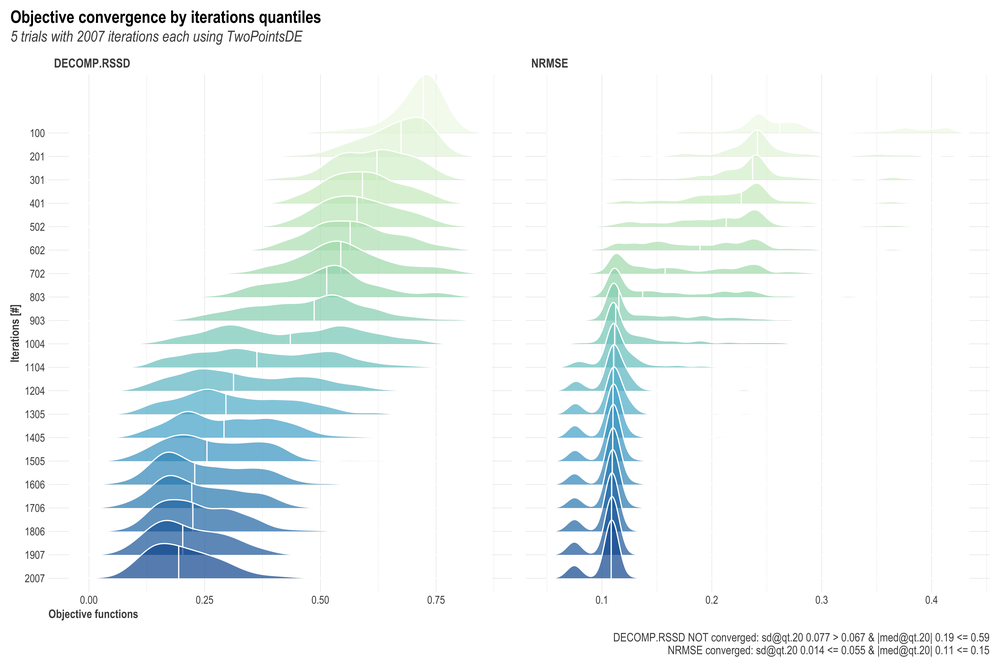

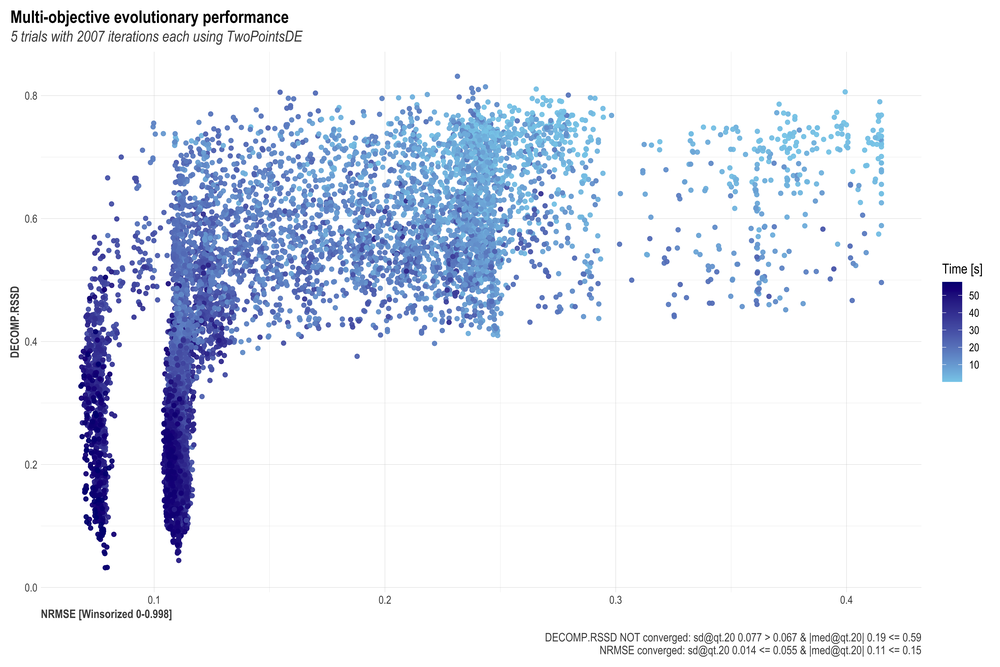

In [12]:
from utils.plot_utils import plot_outputgraphs

# Plot the graphs
moo_distrb_plot = plot_outputgraphs(model_outputs, "moo_distrb_plot")
moo_cloud_plot = plot_outputgraphs(model_outputs, "moo_cloud_plot")